# Trabajo en grupo 2018 - Filtros de imágenes
_Arquitectura de Computadores, 2018._

## Autores:
 - Álvaro Baños Gomez, UO245852.
 - Guillermo Facundo Colunga, UO236856.
 - Alejandro León Pereira, UO258774.
 - Iñaki Salgado Uralde, UO237133.

# Sumario
--------------
* [Introducción](#Introducción)
 - [Problema a resolver](#Problema-a-resolver)
 - [Entorno de trabajo](#Entorno-de-trabajo)
* [Soluciones implementadas](#Soluciones-implementadas)
 - [Algoritmo monohilo secuencial](#Algoritmo-monohilo-secuencial)
 - [Versión monohilo SIMD](#Versión-monohilo-SIMD)
 - [Versión multihilo](#Versión-multihilo)
* [Conclusiones](#Conclusiones-generales)
---------------

# Introducción

Durante el curso de Arquitectura de Computadores de la Universidad de Oviedo 2018 se propone un trabajo en grupos sobre el alumnado en el cual tendrán que realizar la implementación de un problema con distintos métodos: un algoritmo secuencial, uno que emple instrucciones SIMD y por último uno multihilo. Y a continuación realizar un análisis de los resultados obtenidos e ilustrar las mejoras de rendimiento que pueden obtenerse con los distintos métodos implementados.

Para ello se expondrá: el problema que resolvió este grupo, el entorno de trabajo sobre el que se implmentó y tomaron las medidas de tiempo, las diferentes implementaciones realizadas y las conclusiones individuales y generales de las distintas versiones de la solución.

## Problema a resolver

Para este grupo el problema a resolver era el de fusionar dos imágenes RGB que el programa recibía de entrada emplenado el método de fusión por amplitud y obtener una imagen resultante de la fusión en la que cada valor de las componentes RGB esté en tipo `float`.

Para resolver este problema debemos de plantearnos dos preguntas, la primera es cómo representar la imagen en el ordenador y la segunda, qué es el método de fusión por amplitud. Una vez estas dos preguntas estén resultas tan sólo quedará la implementación.

### Representación de imágenes

Para saber como se representa una imagen en el ordenador debemos de imaginar que una imagen no es mas que una matriz de valores. Entonces, una abstracción de una matriz es una lista en la que todas sus filas están puestas una detrás de otra.

$$\begin{bmatrix}
1 & 2 & 3\\ 
4 & 5 & 6 \\ 
7 & 8  & 9
\end{bmatrix} = \left [ 1 \ 2\ 3\ 4\ 5\ 6\ 7\ 8\ 9\ \right ]$$

Entonces, una imagen RGB está compuesta por 3 matrices, una para los valores de R (color rojo), otra para los valores de G (color verde) y otra para los valores de B (color azul). De forma que el pixel $(0,0)$ estaría compuesto por los valores $R[0,0]$, $G[0,0]$, $B[0,0]$.

Pero sabemos que una matriz se puede representar como una lista de sus filas. Entonces 3 matrices se pueden representar como una única lista de todas sus filas. 

$$\begin{bmatrix}
1 & 2\\ 
3 & 4
\end{bmatrix} \begin{bmatrix}
5 & 6\\ 
7 & 8
\end{bmatrix} \begin{bmatrix}
9 & 10\\ 
11 & 12
\end{bmatrix} = \left [ 1\ 2\ 3\ 4\ 5\ 6\ 7\ 8\ 9\ 10\ 11\ 12 \right ]$$

Por lo tanto una imagen se representará como una única lista o vector en la que están todas sus componentes. Como se puede ver en el siguiente ejemplo donde tenemos un vector compuesto por los valores de la componente R de la imagen, a continuación los valores de la componente G y finalmente los valores de la componente B.

$$v = [\ r_{1},\ r_{2},\ r_{3},\ ...,\ r_{n},\ g_{1},\ g_{2},\ g_{3},\ ...,\ g_{n},\ b_{1},\ b_{2},\ b_{3},\ ...,\ b_{n}\ ]$$

### Método de fusión por amplitud

Ahora que ya sabemos como se representa una imagen ya podemos aplicar operaciones sobre ella y por tanto definir el método de fusión por amplitud.

Pero primero debemos de saber lo que es la amplitud. La amplitud es la medida que se emplea para indicar el valor de una componente en un pixel determinado.

Por tanto, la fusión po amplitud se define como,

$$(R{_{3}}, G{_{3}}, B{_{3}}) = \left ( \frac{\sqrt{R{_{1}}^{2} + R{_{2}}^{2}}}{\sqrt{2}},  \frac{\sqrt{G{_{1}}^{2} + G{_{2}}^{2}}}{\sqrt{2}}, \frac{\sqrt{B{_{1}}^{2} + B{_{2}}^{2}}}{\sqrt{2}} \right )$$

Donde 1 y 2 representan las imágenes de entrada y 3 la imágen de salida. Así pues se debe de aplicar esta fórmula para obtener cada pixel de la imagen fusionada (compuesto por 3 valores, R, G y B).

Sin embargo esta fórmula puede simplificarse mucho si tenemos en cuenta como representamos las imágenes en el ordenador. Recordemos que una imagen es un vector donde están comprendidas todas sus componentes. Y si observamos la fórmula de fusión por amplitud nos damos cuenta de que siempre se emplea la misma operación sobre las firerentes componentes. Por lo tanto podemos definir una **función general de transfomación** que en lugar de tener en cuenta compoenntes trabaje sobre todos los elementos de las listas que forman las imágenes de entrada y salida. 

De esta forma la función general de transformación se define cómo,

$$imagenSalida[i] =\frac{\sqrt{imagenEntrada1[i]^{2} + imagenEntrada2[i]^{2}}}{\sqrt{2}}$$

Así mismo como material adicional y para entender mejor nosotros el método de fusión por amplitud hemos realizado este notebook ( [ipynb](image-amplitude-fusion.ipynb), [html](image-amplitude-fusion.html) ) que seguro resultará de ayuda para comprender todos los aspectos del metodo de fusión por amplitud. En él se explica y analiza la función de transformación.

# Entorno de trabajo

Para llevar a cabo este trabajo en grupo los profesores de la asignatura facilitaron una máquina virtual ubuntu pre-configurada y con proyectos de ejemplo. Sin embargo cada equipo ha de realizar una pequeña configuración dependiendo del equipo físico (host) donde se vaya a ejecutar la M.V. Dichas configuraciones afectarán tanto a la implementación como a la ejecución y análisis de las soluciones. Por tanto, en este apartado se muestra la configuación empleada sobre la que se dearrollaron y analizaron las soluciones.

## Configuración máquina virtual

Como entorno de trabajo se usará una máquina virtual ubuntu y el IDE Eclipse para C/C++. La máquina virtual se configura con 4 procesadores, que se corresponde con el máximo número de procesadores que contiene el sistema donde se ejecuta la máquina virtual. Dicha configuración se ilustra con la siguiente imágen.

![conf_img](https://github.com/thewilly/GIISOF01-2-002-Arquitectura-Computadores/raw/master/notebooks/data/configuration.png)

Para ver la configuración final de la cpu de la máquina virtual encontrarás el archo cpu-info en el directorio `/data`.

## Características máquina virtual

Pese a que esta información puede ser encontrada en el archivo cpu-info en el directorio `/data` aquí se destacan aquellos aspectos que más influirán en las implementaciones y ejeciciones de las soluciones.

**Procesador:** Intel(R) Core(TM) i7-3770 CPU @ 3.40GHz
![conf_img](https://github.com/thewilly/GIISOF01-2-002-Arquitectura-Computadores/raw/master/notebooks/data/cpu-model.png)

**Memoria base:** 32.768 MB (32Gb)

**Instrucciones SIMD soportadas:**
![conf_img](https://github.com/thewilly/GIISOF01-2-002-Arquitectura-Computadores/raw/master/notebooks/data/cpu-flags.png)

 - MMX: Si
 - SSE: Si
 - SSE2: Si
 - SSE3: No
 - SSSE3: Si
 - SSE4.1: Si
 - SSE4.2: Si
 - AVX: Si
 - AVX2: No
 - AVX-512F: No
 
**Nivel de concurrencia del sistema:**
 
De los apartados anteriores y de la página del [fabricante](https://ark.intel.com/es/products/65719/Intel-Core-i7-3770-Processor-8M-Cache-up-to-3-90-GHz-) podemos saber que nuestro procesador tiene 4 núcleos y que cada núcleo es capaz de ejecutar 2 hilos de forma simultanea sin emplear tiempo compartido (Hyper-Threading). Por lo tanto tenemos 1 Procesador x 4 Núcleos x 2 Hilos/Núcleo = 8 Hilos.
 
Esto signifoca que podemos usar 8 hilos de forma simultanea sin emplear tiempo compartido.

# Soluciones implementadas

Como se comentada en la introducción uno de los objetivos de este trabajo en grupo era el de implementar una solución al problema usando diferentes técnicas. Cada técnica da lugar a un algortimo diferente pero con la misma semántica y por lo tanto tendremos un algoritmo secuencial, uno secuencial con instrucciones SIMD y uno multi-hilo. En este apartado estudiaremos las firefentes implementaciones realizadas para cada uno de estos algoritmos.

> Una noción muy importante a tener en cuenta en todas las implementaciones es que las imágenes de entrada y salida tendrán el mismo tamaño, es decir ancho, alto y nº de componentes. Por lo tanto si las imágenes de entrada tienen distinto tamaño el programa terminará de forma controlada y advirtiendo al usuario del error encontrado.

## Algoritmo monohilo secuencial

Un algortimo monohilo secuencial es aquel que emplea un único hilo de ejecución y las instrucciones que realiza se ejecutan una detras de otra, esperando a que la instrucción anterior termine para ejecutar la siguiente.

Por lo tanto y con la función general de transformación que habíamos realizado durante la introducción, un algortimo secuencial monohilon sería aquel que para cada elemento del vector de la imágen de salida ejecutase la función general de transformación.

### Pseudocódigo
```
PARA CADA elemento DEL VECTOR DE LA IMAGEN DE SALIDA
  elemento = sqrt(imagen_entrada1[elemento]^2 + imagen_entrada2[elemento]^2) / sqrt(2)
```

Una vez tenemos el algortimo diseñado en pseudocódigo procedemos a realizar su implmentación en C++.

### C++
```c++
for (int i = 0; i < imagesSize; i++) {
    p_outputImage[i] = 
        sqrtf(pow(p_inputImage1[i], 2.0f) + pow(p_inputImage2[i], 2.0f)) / SQRT2;
}
```

Se puede encontrar la implementación completa en [Main.cpp](https://github.com/thewilly/GIISOF01-2-002-Arquitectura-Computadores/blob/master/Singlethread/Src/Main.cpp).

> **Nota**: _Como la ejecucion del algoritmo anterior dura menos de 5 segundos se anida dentro de un bucle `for` que lo repetirá 25 veces. Con lo que el tiempo de la ejecución del programa será superior a los 5 segundos, **pero se estará ejecutando el algoritmo 25 veces**._

> **Nota**: _En el agortimo anterior se ha realizado una pequeña optimización sacando factor común a sqrt(2) fuera del bucle. Por lo que este valor no se computa cada vez que se necesita si no que se define en una constante al inicio del Main.cpp._

> **Nota**: _Como se puede ver en el algoritmo no se realiza ningún tipo de validación sobre los datos resultantes de aplicar la función de transformación, esto es, por que durante el análisis se probó que para valores de entrada en un rango [0.0, ..., 255.0] los valores resultantes estarán siempre comprendidos en ese mismo rango._

### Análisis del algoritmo implementado

Una vez implementada nuestra solución monohilo secuencial debemos de realizar un pequeño análisis para posteriormente compararlo con los otros dos algoritmos. Para realizar tanto este como futuros análisis usaremos python como si se tratase de una calculadora muy potente.

Con el fin de realizar un análisis sobre una muestra representativa y más o menos precisa se realizan 10 muestreos en modo release. Con lo que si alguno de los muestreos se ve afectado por alguna variable del sistema no afectará de forma directa ni representativa a las conclusiones.

A continuación se muestran los tiempos obtenidos tras 10 ejecuciones en modo Release.

In [1]:
import pandas as pd
executions = 25.0
data = pd.Series([5.508572,5.464005,5.391564,5.476413,5.351255,5.437835,5.454087,5.444019,5.426735,5.429995],
                 index=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
unique_executions = data/executions
table = pd.DataFrame({'Duración (s) X 25 Ejecuciones':data})
table

,Duración (s) X 25 Ejecuciones
1,5.508572
2,5.464005
3,5.391564
4,5.476413
5,5.351255
6,5.437835
7,5.454087
8,5.444019
9,5.426735
10,5.429995


Como se puede ver en la tabla anterior los tiempos de ejecución para 25 ejecuciones de nuestro algoritmo están en torno a los 5,4 segundos. Sin embargo de la tabla anterior se pueden extraer muchos más datos.

Primero vamos a dibujar un histograma con la frecuencia y dispersión de los datos obtenidos. Sin embargo para centrarnos más en las ejecuciones individuales del algoritmo dividiremos los resultados obtenidos entre el número de ejecuciones totales, 25.

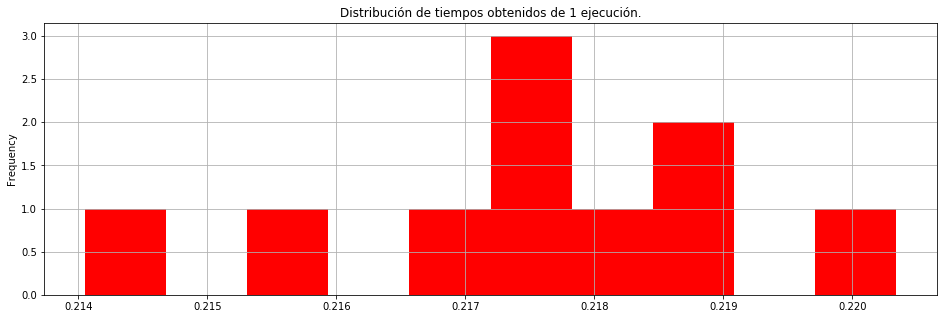

In [3]:
import matplotlib.pyplot as plt
unique_executions.plot(kind='hist',color='red',
                        grid=True, title='Distribución de tiempos obtenidos de 1 ejecución.',
                        figsize=(16,5))
plt.show()

En el histograma anterior se puede ver que tenemos una dispersión de resultados que va desde 0.214 segundos hasta los 0.220 segundos. Este será el rango en el que se encuentra el tiempo de ejecución individual de nuestro algoritmo secuencial monohilo. También se puede observar que la dispersión de datos se corresponde con una distribución normal centrada en torno a 0.2175 segundos, lo que en un principio parece ser la media.

Ahora realizaremos algunos calculos más para intentar averiguar la media, desviación típica e intervalo de confianza.

In [4]:
from scipy import stats
import numpy as np
import scipy as sp
mean = np.mean(data)
mean_iterative = mean
std = np.std(data)
var = data.var()
print("Media", executions,"ejecuciones:", mean, "s.")
print("Desviación estándar", executions,"ejecuciones:", std, ".")
print("Intervalo de confianza", executions, "ejecuciones:",stats.norm.interval(0.05,loc=mean,scale=std) ,".")
print("Media 1 ejecución:", np.mean(unique_executions), "s.")

Media 25.0 ejecuciones: 5.438448 s.
Desviación estándar 25.0 ejecuciones: 0.0415899546333 .
Intervalo de confianza 25.0 ejecuciones: (5.4358400279501407, 5.4410559720498579) .
Media 1 ejecución: 0.21753792 s.


### Conclusiones

Una vez implementado y analizando los resultados del algoritmo secuencial monohilo podemos afirmar que,

 - La implementación de un algoritmo secuencial monohilo se puede realizar en unas pocas lineas si se ha realizado un buen análisis del problema a resolver. Lo que facilita enormemente la tarea del programador e incluso ayuda a reducir el número de posibles errores durante la implementación.
 - El algoritmo implementado es capaz de realizar 25 ejecuciones en 5,438558 segundos. O lo que es lo mismo, 4,6 fusiones de imágenes por segundo.

## Versión monohilo SIMD

Algunas arquitecturas implementan ciertos juegos de instrucciones denominados SIMD o instrucciones multimedia. Precisamente se emplean, generalmente, sobre operaciones que se repiten, ya que permiten realizar dichas operaciones sobre un número fijo de elementos al mismo tiempo. Es una técnica de paralelismo, pero a nivel de datos. Ya que se realiza la misma instrucción sobre datos diferentes. Para emplear este tipo de instrucciones usaremos las denominadas funciones intrínsecas (intrinsics). [Aquí](https://es.wikipedia.org/wiki/SIMD) encontrarás más información sobre las intrucciones SIMD.

En nuestro caso se nos asignaron aquellas funciones SIMD que operaran con paquetes de datos de 128 bits. Y como se comentó en la introducción usamos el tipo `float`, cada `float` en C ocupa 32 bits. Esto se traduce en que finalmente cada instrucción SIMD operará sobre 4 elementos de tipo `float`.

Lo primero es diseñar el algormitmo en psudocódigo. En este caso, a diferencia del algortimo secuencial monohilo, será un poco más complejo para poder acercarnos más al nivel de instrucciones SIMD. Es decir, descompondremos la función general de transformación en operación simples.

### Pseudocódigo

```
PARA CADA 4 elementos DEL VECTOR DE LA IMAGEN DE SALIDA
  
  paqueteImagen1 = cargarSIMD(imagen1)
  paqueteImagen2 = cargarSIMD(imagen2)
  
  cuadradoImagen1 = cuadradoSIMD(paqueteImagen1)
  cuadradoImagen2 = cuadradoSIMD(paqueteImagen2)
  
  sumaDeCuadrados = sumaSIMD(cuadradoImagen1, cuadradoImagen1)
  
  raizSuma = raizSIMD(sumaDeCuadrados)
  
  division = divisionSIMD(raizSuma, raiz2)
  
  guardarSIMD(imagenSalida, division)
  
```

Como se puede ver en el psudocódigo lo que se hace es descomponer la función general de transfomación en operaciones elementales e iterar de 4 en 4 elementos.

### C++

Para implamentar el pseudocódigo anterior con instrucciones SIMD lo primero es identificar qué intrucciones debemos de emplear. Lo primero es hacer referencia a los juegos de instrucciones soportados por nuestro procesaror, los cuales se describieron en la introducción. A continuaciónecordemos que debemos de trabajar sobre vectores de formato `float`. A esto se le suma la restricción de usar paquetes de datos de 128 bits, por lo que estas són las instrucciones intrínsecas que usaremos para implementar el algoritmo.

 - Para cargar los vectores de información -> `_mm_loadu_ps`.
 - Para realizar el cuadrado usaremos una múltiplicación de un elemento por el mismo ya que no existe la función potencia necesaria, por tanto -> `_mm_mul_ps`.
 - Para sumar -> `_mm_add_ps`.
 - Para la raíz cuadrada -> `_mm_sqrt_ps`.
 - Para dividir -> `_mm_div_ps`.
 - Para guardar en el vector de infomación de la imagen resultante -> `_mm_storeu_ps`.
 
 > **Nota:** En las instrucciones intrínsecas anteriores el sufijo u en load y store significa que se realiza sobre elementos no alineados. Y el sufijo `_ps` en todas las instrucciones nos indica que es una operación con punto flotante.

Una vez tenemos las instrucciones identificadas procedemos a sustituir las instrucciones de pseudocódigo por las funciones intrínsecas apropiadas.

`PIXELS_PER_DATA_PACKAGE` = 128 bits / 32 bits = paquetes de 4 elementos.

```c++
for (int i = 0; i < IMAGES_SIZE; i += PIXELS_PER_DATA_PACKAGE) {

	// Loading input images.
	dataPackageImage1 = _mm_loadu_ps(&p_compImage1[i]);
	dataPackageImage2 = _mm_loadu_ps(&p_compImage2[i]);

	// Computing the squares.
	squareDP1 = _mm_mul_ps(dataPackageImage1, dataPackageImage1);
	squareDP2 = _mm_mul_ps(dataPackageImage2, dataPackageImage2);

	// Addition of the squares.
	additionOfSquaresDP12 = _mm_add_ps(squareDP1, squareDP2);

	// Computing the square root of the addition of the squares.
	squarerootDPS = _mm_sqrt_ps(additionOfSquaresDP12);

	// Computing the division of the squarerootDPS over the square root of 2.
	division = _mm_div_ps(squarerootDPS, V_SQRT2);

	// Storing the result on to the destination image information vector.
	_mm_storeu_ps(&p_dstImage[i], division);

}

```

> **Nota**: _Como la versión secuencial del algoritmo se ejecutó un total de 25 veces, la versión SIMD también se ejeutará un total de 25 veces para obtener una medida de comparación válida._

### Análisis funciones SIMD

Para optimizar lo máximo posible esta versión se han empleado instrucciones intrínsecas assí donde se ha considerano cenesario. A continuación se muestra un pequeño análisis de las instrucciones empleadas.

**_mm_set1_ps**

Esta instrucción se emplea para rellenar un vector de tipo `_mm128` con el valor de la raiz cuadrada de 2. De forma que posteriormente podamos usarlo en las operaciones. Se traduce en el siguiente fragmento de ensamblador.

![conf_img](https://github.com/thewilly/GIISOF01-2-002-Arquitectura-Computadores/raw/master/notebooks/data/assembler0.png)

**_mm_loadu_ps**

Para cargar los vectores desaliniados de las imágenes en vectores de tipo `_m128` con los que posteriormente podamos trabajar.

**_mm_mul_ps**

Para multiplicar vectores de tipo `_m128`. Usaremos esta instrucción para realizar el cuadrado de los números ya que no tenemos una función propiamente dicha para realizar los cuadrados.

**_mm_add_ps**

Se emplea para realizar la suma de los elementod de tipo `_m128` que provienen de la operación anterior.

**_mm_sqrt_ps**

Se emplea para realizar la raíz cuadrada de los elementos de tipo `_m128` que resultan tras aplicar la operación anterior.

**_mm_div_ps**

Se emplea para dividir el resultado de la operación anterior entre el vector de tipo `_m128` que habíamos declarado al principio con la raiz de 2 como elementos.

**_mm_storeu_ps**

Finalmente para volver a guardar los valores en la imagen de destino se emplea esta instrucción sobre el resultado de la operación anterior de tipo `_m128`.

Finalmente, el aalgoritmo en ensamblador queda de la siguiente forma.
![conf_img](https://github.com/thewilly/GIISOF01-2-002-Arquitectura-Computadores/raw/master/notebooks/data/assembler1.png)
![conf_img](https://github.com/thewilly/GIISOF01-2-002-Arquitectura-Computadores/raw/master/notebooks/data/assembler2.png)

A estas capturas de pantalla hemos añadido el archivo algorithm-assembler.asm que contine el algoritmo en ensamblador, para una mejor visualización y comprensión. Dicho archivo se puede encontrar en el directorio `/data`.

### Análisis del algoritmo implementado

Una vez implementada nuestra solución monohilo SIMD y de la misma forma que se hizo con la verisón secuencial monohilo, realizaremos un pequeño análisis del algoritmo implementado.

Con el fin de realizar un análisis sobre una muestra representativa y más o menos precisa se realizan 10 muestreos en modo release. Con lo que si alguno de los muestreos se ve afectado por alguna variable del sistema no afectará de forma directa ni representativa a las conclusiones.

In [5]:
data = pd.Series([1.501447,1.617852,1.676274,1.644540,1.558858,1.689538,1.562833,1.566737,1.633283,1.622175],
                 index=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
unique_executions = data/executions
table = pd.DataFrame({'Duración (s) X 25 Ejecuciones':data})
table

,Duración (s) X 25 Ejecuciones
1,1.501447
2,1.617852
3,1.676274
4,1.644540
5,1.558858
6,1.689538
7,1.562833
8,1.566737
9,1.633283
10,1.622175


Como se puede ver en la tabla anterior los tiempos de ejecución para 25 ejecuciones de nuestro algoritmo SIMD están en torno a los 1,55 segundos.

Cómo hicimos en la versión secuencial monohilo vamos a obtener el histograma con la dispersión y frecuencia de los datos obtenidos. Y de la misma forma el histograma se obtendrá de las ejecuciones individuales, es decir dividiendo los tiempos obtenidos entre 25.

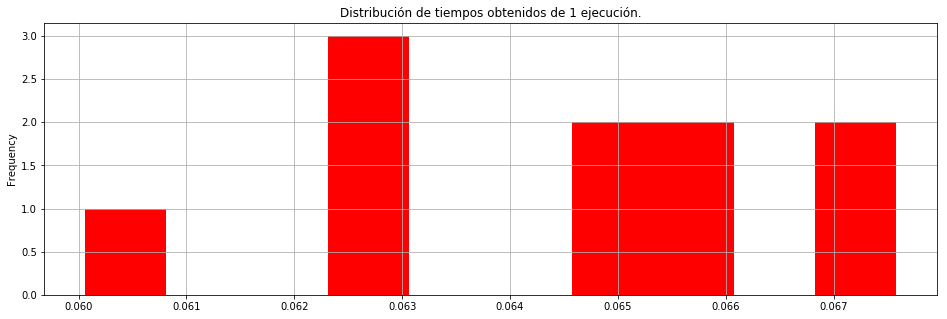

In [6]:
unique_executions.plot(kind='hist',color='red',
                        grid=True, title='Distribución de tiempos obtenidos de 1 ejecución.',
                        figsize=(16,5))
plt.show()

En este caso nos damos cuenta de que el histograma anterior nos muestra una gran dispersión de datos pues no existe ningún nucleo claramente agrupado. Esto es facilmente explicable si se tiene en cuenta que este algoritmo es mucho más rápido que el anterior y por tanto las medidas realizadas son mucho más sensibles a las variables del entorno. Sin embargo la distribución sigue siendo normal con con máximo en 0,063, por lo que para los efectos de este trabajo en grupo las mediciones de este algoritmo se considererá válidas.

Entonces, de la misma forma que con la versión anterior del algortimo vamos a obtener la media, desviación típica e intervalo de confianza.

In [7]:
mean_simd = np.mean(data)
std = np.std(data)
var = data.var()
print("Media", executions,"ejecuciones:", mean_simd, "s.")
print("Desviación estándar", executions,"ejecuciones:", std, ".")
print("Intervalo de confianza", executions, "ejecuciones:",stats.norm.interval(0.05,loc=mean_simd,scale=std) ,".")
print("Media 1 ejecución:", np.mean(unique_executions), "s.")

Media 25.0 ejecuciones: 1.6073537 s.
Desviación estándar 25.0 ejecuciones: 0.0557576656004 .
Intervalo de confianza 25.0 ejecuciones: (1.6038573164445618, 1.6108500835554387) .
Media 1 ejecución: 0.064294148 s.


Entonces, ahora ya tenemos los tiempos de ejecución tanto sobre 25 ejecuciones como individuales de la versión secuencial y SIMD. Lo que significa que podemos realizar nuestra primera comparación entre algoritmos. Para ello calcularemos la aceleración del algoritmo SIMD respecto al inicial (secuencial monohilo).

In [8]:
print("Aceleración SIMD respecto a versión secuencial:", mean_iterative/mean_simd)

Aceleración SIMD respecto a versión secuencial: 3.38347931759


Como vemos en el resultado obtenido el algoritmo SIMD puede realizar 3,38 fusiones de imágenes en el mismo tiempor que el algoritmo secuencial monohilo realiza una única fusión. Por lo que obviamente la implementación SIMD ofrece una mejora significativa.

### Conclusiones

Una vez implementado y analizando los resultados del algoritmo SIMD podemos afirmar que,

 - Pese a la dificultad inicial que puede presentarse al emplear instrucciones multimedia el incremente de rendimiento es significativo.
 - Tras realizar el análisis del algoritmo y la comparativa con so homólogo secuencial se demuestra que la versión SIMD presenta una aceleración de 3.383. Por lo que en un segundo la versión SIMD podría procesar unas 15,6 fusiones. Mientras que la versión secuencias sólo 4,6. Y por lo tanto el rendimiento de la versión SIMD es claramente superior.
 - Al ser los tiempos de ejecución tan pequeños, estos son más susceptible a variaciones por parte de variables del entorno, es por este motivo que la desviación estándar es superior a la versión secuencial.

## Versión multihilo

De la misma forma que la versión monohilo SIMD es una forma de paralelismo pero aplicada a los datos otra estrategia de paralelismo es ejecutar multiples instrucciones al mismo tiempo. O lo que es lo mismo, dinstintos hilos.

Para ello debemos de tener en cuenta el sistema sobre el que estamos trabajando pues el nivel de concurrencia no será el mismo para cada máquina física. Para aprobechar al máximo nuestro sistema emplearemos el nivel máximo de concurrencia posible sin que los hilos empleen tiempo compartido, en nuestro caso 8 hilos.

Por tanto, lo primero, igual que en los casos anteriores será diseár un algoritmo en pseudocódigo que nos divida la carga de trabajo en 8 hilos y que cada hilo aplique la función de transformación general a la carga de trabajo que le toque.

### Pseudocódigo

```
HILO(inicio, fin)
  PARA CADA elemento DESDE inicio HASTA fin
    imagen_salida[elemento] =
              sqrt(imagen_entrada1[elemento]^2 + imagen_entrada2[elemento]^2) / sqrt(2)


PARA CADA hilo DE LOS 8 HILOS DE NUESTRO SISTEMA
  inicio_carga_trabajo = hilo * pixeles_por_hilo
  fin_carga_trabajo = (hilo+1) * pixeles_por_hilo
  
  hilo.procesa()

PARA CADA hilo DE LOS 8 HILOS DE NUESTRO SISTEMA
  hilo.esperaTermine()
```

### C++

Para implementar este algoritmo en C debemos de prestar atención a que tenemos que definir una estructura que guarde la información sobre la tarea que va a realizar cada hilo, en nuestro caso será un puntero a cada vector de las imágenes de entrada y otro para la imágen de salida. Así como la posición inicial y final en las que el hilo tiene que trabajar.

```C++
struct WorkerInfo {
	float *p_vimg1;
	float *p_vimg2;
	float *p_vimgres;
	int startPos;
	int endPos;
};

```

A continuación podemos definir la tarea a desarrollar por nuestros hilos.

```C++
void *worker(void* workerInfo) {
	struct WorkerInfo *wi = (struct WorkerInfo*) workerInfo;

	for(int i = wi -> startPos; i < wi -> endPos; i++) {
		wi -> p_vimgres[i] =
            sqrtf(pow(wi -> p_vimg1[i], 2.0f) + pow(wi -> p_vimg2[i], 2.0f)) / SQRT2;
	}

	return wi;
}
```

Y finalmente definiremos el algotirmo que se encargará de crear la información de cada hilo y cada hilo. Además este algoritmo inicializará los hilos y esperará a que terminen.

```C++
for(int n_thread = 0; n_thread < NUMBER_OF_THREADS; n_thread++) {
	struct WorkerInfo *wi = (struct WorkerInfo*)malloc(sizeof(*wi));
	wi->startPos = n_thread * PIXELS_PER_THREAD;
	wi->endPos = wi->startPos + PIXELS_PER_THREAD;
	wi->p_vimg1 = p_compImage1;
	wi->p_vimg2 = p_compImage2;
	wi->p_vimgres = p_dstImage;

	// Creating all the threads.
	pthread_create(&th[n_thread], NULL, worker, ( void* )wi);
}

// Waiting for all the threads to end.
for(int n_thread = 0; n_thread < NUMBER_OF_THREADS; n_thread++) {
	pthread_join(th[n_thread], NULL);
}
```


> **Nota**: _Como la versión secuencial del algoritmo se ejecutó un total de 25 veces, la versión SIMD también se ejeutará un total de 25 veces para obtener una medida de comparación válida._

Por lo tanto hemos visto que para implementar la versión multihilo en C hacen falta 3 cosas: la información sobre la tarea a ejecutar, la tarea a ejecutar e inicializar las tareas. Una vez tenemos estas tres coasas podemos decir que tenemos nuestro algoritmo multihilo implementado.

### Análisis del algoritmo implementado

Una vez más debemos de realizar un análisis sobre el algoritmo multihilo implementado con el fin de compararlo con las otras dos versiones anteriores, una secuencial y otra SIMD.

Con el fin de realizar un análisis sobre una muestra representativa y más o menos precisa se realizan 10 muestreos en modo release. Con lo que si alguno de los muestreos se ve afectado por alguna variable del sistema no afectará de forma directa ni representativa a las conclusiones.

In [9]:
data = pd.Series([1.604736,1.833460,1.713031,1.657131,1.768429,1.689538,1.833747,1.709104,1.688501,1.698995],
                 index=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
unique_executions = data/executions
table = pd.DataFrame({'Duración (s) X 25 Ejecuciones':data})
table

,Duración (s) X 25 Ejecuciones
1,1.604736
2,1.833460
3,1.713031
4,1.657131
5,1.768429
6,1.689538
7,1.833747
8,1.709104
9,1.688501
10,1.698995


Como se puede ver en la tabla anterior los tiempos de ejecución para 25 ejecuciones de nuestro algoritmo multihilo están en torno a los 1,7 segundos.

Cómo hicimos en las versiones anteriores vamos a obtener el histograma con la dispersión y frecuencia de los datos obtenidos. Y de la misma forma el histograma se obtendrá de las ejecuciones individuales, es decir dividiendo los tiempos obtenidos entre 25.

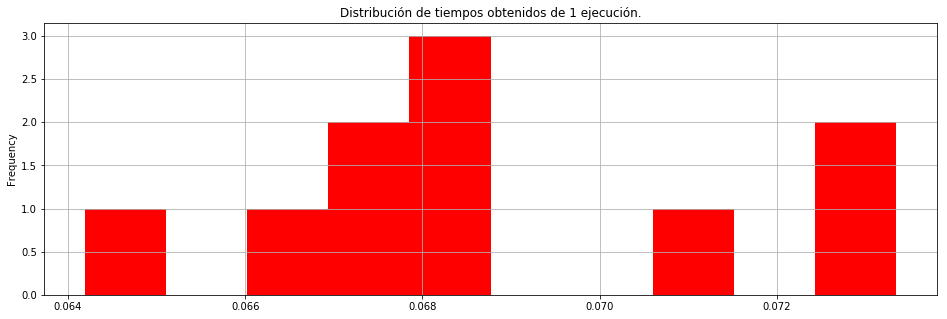

In [10]:
unique_executions.plot(kind='hist',color='red',
                        grid=True, title='Distribución de tiempos obtenidos de 1 ejecución.',
                        figsize=(16,5))
plt.show()

Para este caso, al contrario que en el anterior, los datos se agrupan en torno al 0,068 formando una distribución estándar centrada en 0.068.

Entonces, de la misma forma que con la versión anterior del algortimo vamos a obtener la media, desviación típica e intervalo de confianza.

In [11]:
mean_mt = np.mean(data)
std = np.std(data)
var = data.var()
print("Media", executions,"ejecuciones:", mean_mt, "s.")
print("Desviación estándar", executions,"ejecuciones:", std, ".")
print("Intervalo de confianza", executions, "ejecuciones:",stats.norm.interval(0.05,loc=mean_mt,scale=std) ,".")
print("Media 1 ejecución:", np.mean(unique_executions), "s.")

Media 25.0 ejecuciones: 1.7196672 s.
Desviación estándar 25.0 ejecuciones: 0.0692262473312 .
Intervalo de confianza 25.0 ejecuciones: (1.7153262450807607, 1.7240081549192392) .
Media 1 ejecución: 0.068786688 s.


En este punto ya tenemos los datos suficientes como para comparar los tres algoritmos implementados de forma que se puedan ordenar de más eficiente a menos, en términos de tiempo empleado.

In [12]:
print("Aceleración SIMD respecto a versión secuencial:", mean_iterative/mean_simd)
print("Aceleración multihilo respecto a versión secuencial:", mean_iterative/mean_mt)
print("Aceleración SIMD respecto a versión multihilo:", mean_mt/mean_simd)

Aceleración SIMD respecto a versión secuencial: 3.38347931759
Aceleración multihilo respecto a versión secuencial: 3.16250027912
Aceleración SIMD respecto a versión multihilo: 1.0698747886


De la forma anterior obtenemos los algoritmos ordenados por aceleraciones, de esta forma, el más rápido, es el SIMD. Sin embargo estuaremos en profundidad estos datos en el apartado de conclusiones.

# Conclusiones generales

Durante la realización de este trabajo en grupo se presentaron conclusiones de forma parcial que en este apartado serán ampliadas y explicadas con el máximo detalle posible.

La primera conclusión que se puede extraer tras la realización de este trabajo en grupo es que la programación secuencial monohilo acostumbra a ser la más sencilla de todas, sin embargo esta sencillez resulta en un rendimiento pésimo e inaceptable cuando se es conocedor de otras técnicas de programación más avanzadas.

La segunda conclusión es que tanto la versión con instrucción multimedia como la versión multihilo pueden parecer más complicadas, pero si se abordan con un buen diseño inicial resultan igual de sencillas de programar.

La tercera conclusión versaría sobre que versión es más rápida, si la SIMD o la multihilo. Bien esta no es una cuestión que se pueda tomar a la ligera pues podría inducir a equivocación. Esto viene dado de que la versión multihilo realiza n operaciones pero de forma simuiltanea (8 hilos), mientras que la versión SIMD realiza n/4 operaciones pero de forma secuencial. Y he aquí el porqué no se pueden comparar de forma general ambos algoritmos ya que los resultados obtenidos dependerán directamente del tamaño de las imágenes a fusionar. Para este caso en particular resulta que es un poco más eficiente realizar menos operaciones de forma secuencial, es decir usar el nivel de paralelismo de datos o SIMD.

Por último y como conclusión final. La solución ideal puede no ser niguna de las implementaciones aquí vistas si no un compendio de las dos últimas. Un algoritmo multihilo que emplee instrucciones multimedia en cada hilo. De esta forma reduciríamos el tamaño del problema y el número de operaciones realizadas en cada hilo. Para ilustrar la mejora que conseguiría esta versión se ha implementado de forma totalmente voluntaria la versión Multithread-SIMD, se encuentra en la carpeta Multithread-SIMD. Esta versión tiene una média de tiempo para 25 ejecuciones de 1,214s. Lo que se traduce en 0,048 segundos por fusión de imágenes. O lo que es lo mismo, una aceleración de 1,323 respecto a la versión más rápida anterior (SIMD). Así mismo también se puede observar que estamos llegando al límite de las optimizaciones posibles pues cada vez es necesario un esfuerzo mayor para realizar una mejora relativamente significativa.